# Velib' DataCamp: Solving the bicycle availability issue. 

*Thomas Sergent, Tina Béclin, Maéva Rouolt, Lorenzo Gentili, Walid Nasr*

## Introduction

Smoovengo is the new service provider for Paris Velib' services. Keeping/improving customers satisfaction while implementing a new logistic framework is not always straightforward.


Paris Vélib' is faced, on a daily basis, to logistical issues, and has to relocate bicycles constantly during the course of the day.

Indeed, bicycle' stations can only contain a limited number of locations for logistical and economic reasons. Generally, stations which have a greater location experience a huge demand. Consequently, bicycles may be completely unavailable in some locations, whilst parking problems exist for others. 

It would be a huge loss of value for Smoovengo if users decided to use another services to make their daily trips. One important element for a customer is the possibility to use the nearest station to take a bike and make his ride.
In this context, the availability of bicycles at a given station will become Smoovengo daily battle. One solution would be to  anticipate the stations that would need a refill during the day. 


The goal of this project is to develop a prediction model that is able to identify which Velib' station will be full or empty at H+1.


## The prediction task


Using data at H-1, we will be able to predict if a station is empty of full at H. 

Trucks redistribute bikes during the day to avoid the fact some stations to become empty or full. Input and output stream of the bikes depend mostly on the place of the station. If the output stream is faster than the input stream, the station will empty. If the input stream is faster than the output stream, the station will get full. 

Even if few techniques are used today to ensure a good distribution of the bikes, the system is far from being perfect, since it's often difficult to find a bike or to find a dock for the bike we are using.

The model we propose will allow Vélib’ to be more efficient in the redistribution of the bicycles in the stations knowing which station will be empty in an hour, the vans and bus journey will be more efficient on deserving the stations.

The data we will manipulate is from https://opendata.paris.fr/page/home/.


## Requirements

    numpy>=1.10.0
    matplotlib>=1.5.0
    pandas>=0.19.0
    scikit-learn>=0.17 

Folium will be installed through the imports, if not previously done. 


## File Description

The dataset is directly imported from the link we specified in the "Prediction task" section (.csv file).This dataset contains informations on several variables. 

Each station is characterized by its id. For each station, the variable numBikesAvailable gives us the number of bikes available since the number of Docks available is given by the variable numDocksAvailable. T
The capacity is obtained by summing the number of bikes available and the number of docks available for each station. 

Each station location is given by its longitude and its lattitude thanks to the variables lon and lat. 

A station is said non functioning if its number of bikes available or its number of dock availble isn't different from 0. And even with a number different from 0, this number must be a minimum high so the station can be fully operational.

## Imports

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
!{sys.executable} -m pip install folium

import folium
from folium.plugins import MarkerCluster

## Exploratory data analysis

### Loading the data

In [56]:
data = pd.read_csv("C:/Users/loren/Desktop/velib-disponibilite-en-temps-reel.csv", sep=';')
data = data.fillna('')
data


,station_id,name,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity,Is_Full,Quartiles,lon,lat,xy
0,27415736,,0,1,1,0,1,0,,,,,
1,27415256,,1,1,1,32,1,33,3%,25%,,,
2,27415150,,0,1,1,0,1,0,,,,,
3,39254792,,0,1,1,51,1,51,0%,25%,,,
4,7247,Charonne - Pierre Bayle,4,1,1,19,1,23,17%,25%,2.3904,48.8584,"48.8584450543, 2.39039812239"
5,27363489,,3,1,1,24,1,27,11%,25%,,,
6,15462861,Crevaux - Bugeaud,4,1,1,27,1,31,13%,25%,2.28115,48.8708,"48.8708094287, 2.28114900769"
7,27414527,,3,1,1,17,1,20,15%,25%,,,
8,37647,,18,1,1,12,1,30,60%,75%,,,
9,7254,Gay Lussac - Saint-Jacques,5,1,1,19,1,24,21%,25%,2.34192,48.8447,"48.8447302561, 2.34192394487"


This dataset is composed of 225 rows and 13 columns. 

We can notice that is_installed and is_renting are always equal to 1 which indicates that there is not any misfunction in our system. Morover, we added some variables Is_Full representing the percentage of fullness of a station and its Quartiles. 


In [57]:
data.dtypes

station_id            int64
name                 object
numBikesAvailable     int64
is_installed          int64
is_renting            int64
numDocksAvailable     int64
is_returning          int64
capacity              int64
Is_Full              object
Quartiles            object
lon                  object
lat                  object
xy                   object
dtype: object

In [58]:
data.describe()

,station_id,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity
count,2.250000e+02,225.000000,225.0,225.0,225.000000,225.0,225.000000
mean,2.144910e+07,4.360000,1.0,1.0,20.773333,1.0,25.133333
std,1.349949e+07,4.950577,0.0,0.0,11.853164,0.0,12.743696
min,6.245000e+03,0.000000,1.0,1.0,0.000000,1.0,0.000000
25%,1.328399e+07,1.000000,1.0,1.0,15.000000,1.0,19.000000
50%,2.736328e+07,3.000000,1.0,1.0,20.000000,1.0,24.000000
75%,2.741555e+07,6.000000,1.0,1.0,28.000000,1.0,33.000000
max,3.988763e+07,47.000000,1.0,1.0,60.000000,1.0,66.000000


In [59]:
data.count()

station_id           225
name                 225
numBikesAvailable    225
is_installed         225
is_renting           225
numDocksAvailable    225
is_returning         225
capacity             225
Is_Full              225
Quartiles            225
lon                  225
lat                  225
xy                   225
dtype: int64

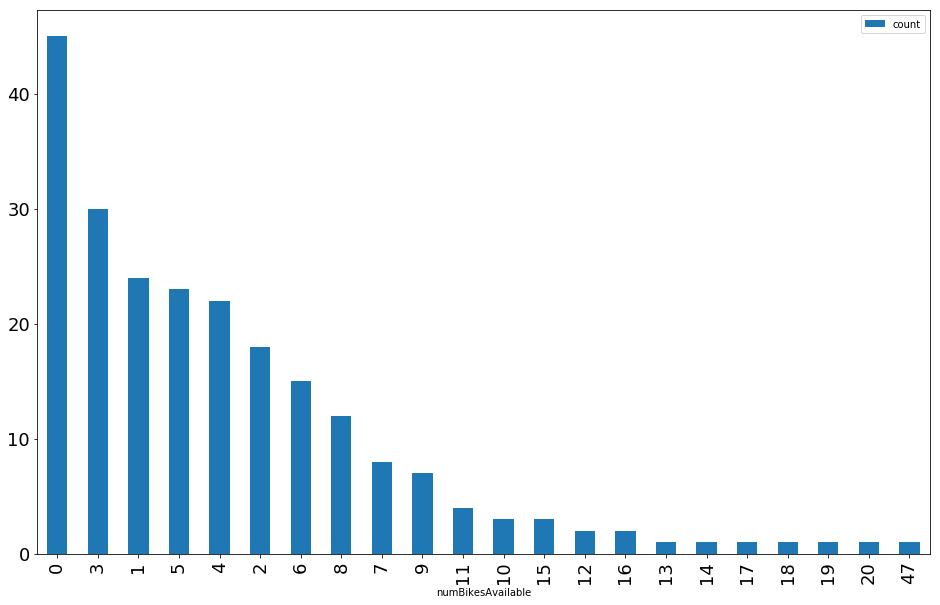

In [60]:
data.groupby('numBikesAvailable').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='numBikesAvailable', y='count', figsize=(16, 10), fontsize=18);

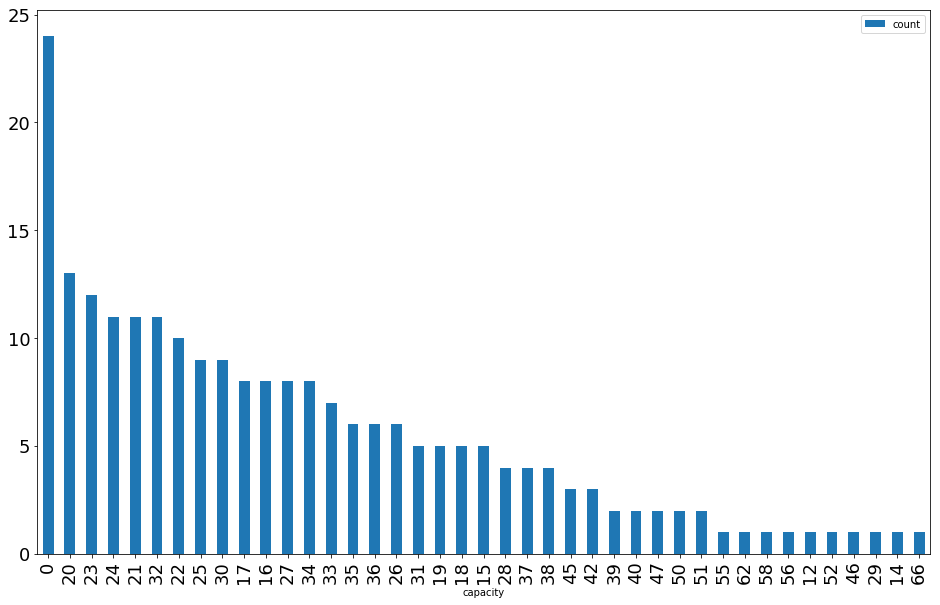

In [69]:
Nda=data.groupby('capacity').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='capacity', y='count', figsize=(16, 10), fontsize=18);

In [62]:
print(np.unique(data['name']))
print(len(np.unique(data['name'])))


['' 'Alexander Fleming - Belvédère' 'Arsonval Falguière'
 'Assas - Luxembourg' 'Assas - Rennes' 'Athènes - Clichy' 'Bassano -  Iéna'
 'Belleville -  Pré Saint-Gervais' 'Bruant-Vincent Auriol'
 'Charenton - Jardiniers' 'Charonne - Pierre Bayle' 'Chernoviz - Raynouard'
 'Chevreuse - Montparnasse' 'Choron - Martyrs' 'Colonel Monteil - Brune'
 'Colonel Pierre Avia' 'Crevaux - Bugeaud' 'Cujas - Saint-Michel'
 'Duhamel - André Gide' "Eglise d'Auteuil" 'Favart - Italiens'
 'Flandrin - Longchamp' 'Galilée - Kléber'
 'Gare du Nord - Saint-Vincent de Paul' 'Gay Lussac - Saint-Jacques'
 'Geoffroy-Saint-Hilaire - Saint-Marcel' 'George Sand-Jean De La Fontaine'
 'Goubet - Darius Milhaud' 'Gouthière - Poterne des Peupliers'
 'Grands Moulins de Pantin' 'Hauteville - Bonne Nouvelle'
 'Hautpoul - Jean Jaurès' 'Institut de France'
 'Jean-Baptiste Pigalle - La Bruyere' 'Jules Vallès - Charonne'
 'La Motte-Picquet Grenelle' 'Le Brix et Mesmin-Jourdan'
 'Le Vau - Maurice Bertaux' 'Louis Lumière' 'Mairie du

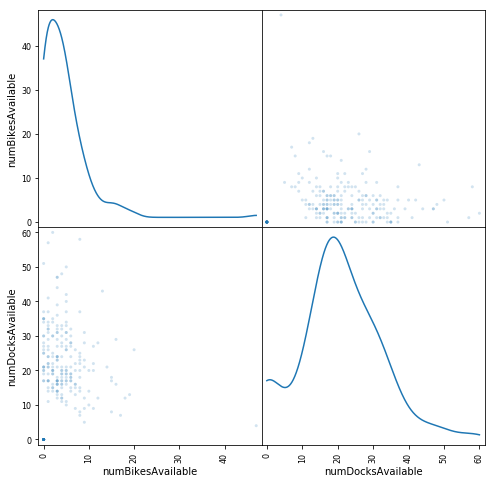

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.get(['numBikesAvailable', 'numDocksAvailable','name']), alpha=0.2,figsize=(8, 8), diagonal='kde');


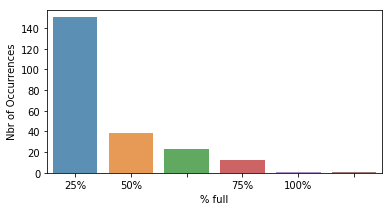

In [68]:
import seaborn as sns


is_full = data['Quartiles'].value_counts()

plt.figure(figsize=(6,3))
sns.barplot(is_full.index, is_full.values, alpha=0.8)
plt.ylabel('Nbr of Occurrences', fontsize=10)
plt.xlabel('% full', fontsize=10)
plt.show()

In [67]:
map = folium.Map(location=[48.85,2.35],tiles="OpenStreetMap", zoom_start=12)

stations = pd.read_csv("C:/Users/loren/Desktop/velib-emplacement-des-stations.csv", sep=';')

lons = []
lats = []

for each in stations[1:].iterrows():
    lon = each[1]['lon']
    lons.append(lon) 
    lat = each[1]['lat'] 
    lats.append(lat)

# build and display map
# correct the markers adding clustered markers
locations = list(zip(lons, lats))
popups = ['{}'.format(loc) for loc in locations]
map.add_child(MarkerCluster(locations=locations, popups=popups))    
map